In [138]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [139]:
csv_file_path = '/home/lucas/UFOP/ple_2020/analise_midias_sociais/final-work/data/all_pp_posts_haddad_replaced_to_empty_removing_other_words.csv'
df_candidate = pd.read_csv(csv_file_path,encoding = 'utf-8')

In [140]:
df_candidate.head(15)

,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
0,2020-02-29T11:23:27+0000,904277726319518_2878974912183113,bolsonavirus nada erroneo considerar bolsonaro...,bolsonavirus nada erroneo considerar acident...,818,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,4996,209,19,40,58,636,True
1,2020-02-29T09:21:22+0000,904277726319518_2878783568868914,bolsonavirus nada erroneo considerar bolsonaro...,bolsonavirus nada erroneo considerar raio ce...,477,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,2602,84,14,26,19,130,True
2,2020-02-28T00:14:25+0000,904277726319518_2875616525852285,cristiano zanin advogado lula fernando haddad ...,cristiano zanin advogado discutem novidade...,540,mobile_status_update,https://scontent-gru2-2.xx.fbcdn.net/v/t15.525...,3068,120,23,4,20,140,True
3,2020-02-26T12:12:56+0000,904277726319518_2872245456189392,disney pao ano governo bolsonaro sabia falta d...,disney pao ano governo sabia falta dinheiro ...,1068,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,3148,48,24,1306,616,8,True
4,2020-02-26T00:58:59+0000,904277726319518_2871255852955019,bolsonaro tudo indica cometeu crime responsabi...,tudo indica cometeu crime responsabilidade p...,1369,mobile_status_update,None,21619,524,79,68,77,1923,True
5,2020-02-24T19:51:01+0000,904277726319518_2868531243227480,impacto fundeb criamos qualidade educacao nord...,impacto fundeb criamos qualidade educacao nord...,3249,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,10571,86,45,9,2,2635,True
6,2020-02-22T13:03:28+0000,904277726319518_2863199017094036,cronica semana podemos descuidar dois problema...,cronica semana podemos descuidar dois problema...,528,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,2718,80,31,130,34,31,True
7,2020-02-22T00:18:55+0000,904277726319518_2862087573871847,bem falaram carnaval rua sp ia rolar triste ne,bem falaram carnaval rua sp ia rolar triste ne,1289,added_photos,https://scontent-gru1-1.xx.fbcdn.net/v/t1.0-9/...,29857,1003,132,25,14,12585,True
8,2020-02-20T11:28:49+0000,904277726319518_2858610960886175,clara tentativa desestabilizar melhores govern...,clara tentativa desestabilizar melhores govern...,588,mobile_status_update,None,9914,223,12,19,7,820,True
9,2020-02-18T20:38:19+0000,904277726319518_2855332637880674,brasilia discutindo oposicao brasil justo demo...,brasilia discutindo oposicao brasil justo demo...,541,added_photos,https://scontent-gru2-1.xx.fbcdn.net/v/t1.0-9/...,9555,369,32,3,20,2114,True


In [141]:
n_total_posts = len(df_candidate)
print('número total de posts: {0}'.format(str(n_total_posts)))

número total de posts: 1880


In [142]:
n_posts_with_textual_messages = df_candidate[df_candidate.has_textual_message == True].shape[0]
n_posts_without_textual_messages = df_candidate[df_candidate.has_textual_message == False].shape[0]

print('número de posts com mensagens textuais: {0}'.format(str(n_posts_with_textual_messages)))
print('número de posts sem mensagens textuais: {0}'.format(str(n_posts_without_textual_messages)))

número de posts com mensagens textuais: 1799
número de posts sem mensagens textuais: 81


In [144]:
# separando o df de treinamento (30%) e o df de testes(70%) de maneira 'embaralhada'
df_training, df_test = train_test_split(df_candidate,train_size=0.7,test_size=0.3,shuffle=True)

In [145]:
print('número de posts do conjunto de treinamento (70%): {0}'.format(str(len(df_training))))
df_training.head(5)

número de posts do conjunto de treinamento (70%): 1316


,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
1368,2017-02-18T17:41:50+0000,904277726319518_1323948981019055,feliz ser escolhido patrono turma formandos ar...,feliz ser escolhido patrono turma formandos ar...,589,added_photos,https://scontent-gru1-1.xx.fbcdn.net/v/t1.0-9/...,7373,2,44,1,0,1460,True
619,2019-01-08T13:47:58+0000,904277726319518_2117107261703219,cara agora folha atacando fantasmas ministro e...,cara agora folha atacando fantasmas ministro e...,558,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,4652,687,59,61,42,208,True
1724,2016-06-26T20:23:36+0000,904277726319518_1100886483325307,sp novo topo figurar topo cidades inteligentes...,sp novo topo figurar topo cidades inteligentes...,580,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,2554,1,31,0,1,167,True
591,2019-01-19T18:00:23+0000,904277726319518_2133388510075094,escape the debate,escape the debate,6010,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,12369,9508,557,83,270,200,True
954,2018-09-23T15:19:05+0000,904277726319518_2043751069268628,fernando haddad candidato lula vai petrolina j...,candidato vai petrolina juazeiro encontrar...,881,added_video,https://scontent-gru2-2.xx.fbcdn.net/v/t15.525...,3076,24,31,1,25,761,True


In [146]:
print('número de posts do conjunto de teste (30%): {0}'.format(str(len(df_test))))
df_test.head(5)

número de posts do conjunto de teste (30%): 564


,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
1026,2018-09-14T16:07:21+0000,904277726319518_494891547691077,acompanhe passo passo campanha todos cantos br...,acompanhe passo passo campanha todos cantos br...,1893,added_video,https://scontent-gru1-1.xx.fbcdn.net/v/t15.525...,6940,48,48,1,14,532,True
577,2019-01-24T10:40:51+0000,904277726319518_2140147892732489,estadao bastante chateado desempenho bolsonaro...,estadao bastante chateado desempenho davos s...,2138,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,14330,10744,70,43,47,1422,True
574,2019-01-25T11:28:25+0000,904277726319518_2141636845916927,vergonha internacional damares acusa pais hola...,vergonha internacional damares acusa pais hola...,10118,shared_story,https://external-gru1-1.xx.fbcdn.net/safe_imag...,19389,1193,1643,4912,11430,45,True
1400,2016-11-20T13:58:31+0000,904277726319518_1224597500954204,cinema gratuito periferia circuito spcine dezo...,cinema gratuito periferia circuito spcine dezo...,217,shared_story,https://scontent-gru1-1.xx.fbcdn.net/v/t1.0-1/...,1855,0,10,0,0,234,True
1714,2016-06-30T22:17:48+0000,904277726319518_1103376846409604,piscinao coberto cordeiro apos anos luta morad...,piscinao coberto cordeiro apos anos luta morad...,181,added_photos,https://scontent-gru1-1.xx.fbcdn.net/v/t31.0-0...,1196,0,13,0,0,67,True


In [147]:
#============================================================================================
# Implementacao do lda
#============================================================================================

In [148]:
# min_df = 0.01 significa "ignorar termos que aparecem em menos de 1% dos documentos
# max_df = 0.50 significa "ignorar termos que aparecem em mais de 50% dos documentos ".

# max_features=40000
cv = CountVectorizer(stop_words = "english")

data_vectorized = cv.fit_transform(df_training['m_m_p_replaced_to_empty'])

In [149]:
n_components = 6

model_lda = LatentDirichletAllocation(n_components=n_components, # Number of topics
                                      max_iter=100,
                                      #learning_method='online',
                                      random_state=100,
                                      batch_size=128,            
                                      evaluate_every = -1,       
                                      n_jobs = -1,               
                                     )
model_lda.fit(data_vectorized)

LatentDirichletAllocation(max_iter=100, n_components=6, n_jobs=-1,
                          random_state=100)

In [200]:
# objetivo: tentar encontrar um numero bom de tópicos a fim de conseguirmos destinguir as
# categorias 

'''
#forma antiga
for index, topic in enumerate(model_lda.components_):
    print(f'Top 10 words for #{index}')
    main_words_for_topic = [cv.get_feature_names()[i] for i in topic.argsort()[-10:]]
    print(main_words_for_topic)
    print(str(len(main_words_for_topic)))
    message = ' '
    message = message.join(main_words_for_topic)
    print(message)
    print('\n')
'''
# Mostrar as n principais palavras-chave para cada tópico 
def get_topics(vectorizer=cv, lda_model=model_lda, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (topic_weights).argsort()[-n_words:]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords


topic_keywords = get_topics(cv,model_lda,10)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Palavra '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Tópico '+str(i) for i in range(df_topic_keywords.shape[0])]

df_topic_keywords

,Palavra 0,Palavra 1,Palavra 2,Palavra 3,Palavra 4,Palavra 5,Palavra 6,Palavra 7,Palavra 8,Palavra 9
Tópico 0,vai,vida,prefeitura,vamos,ainda,educacao,dia,pessoas,paulo,cidade
Tópico 1,cidade,todos,livre,ato,educacao,povo,vamos,democracia,brasil,vote
Tópico 2,dia,direitos,educacao,brasil,iluminacao,pessoas,hoje,led,cidade,paulo
Tópico 3,mundo,semana,prefeitura,anos,sp,hoje,entrevista,gestao,cidade,paulo
Tópico 4,cada,cidades,pessoas,mundo,ser,prefeitura,presidente,hoje,cidade,paulo
Tópico 5,vice,visita,cidade,entrevista,foto,presidente,rio,caminhada,paulo,candidato


In [201]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Log Likelihood: ", model_lda.score(data_vectorized)) # Maior, melhor
print("Perplexity: ", model_lda.perplexity(data_vectorized)) # Menor, Melhor
# See model parameters
print(model_lda.get_params())

Log Likelihood:  -202850.93498259725
Perplexity:  5309.253673221555
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 100, 'mean_change_tol': 0.001, 'n_components': 6, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [202]:
classifications = ['Investimento/Educação','Democracia','Infraestrutura','Entrevista','Política','Ato de Campanha']

df_topic_keywords ["Classificacao"] = classifications

df_topic_keywords


,Palavra 0,Palavra 1,Palavra 2,Palavra 3,Palavra 4,Palavra 5,Palavra 6,Palavra 7,Palavra 8,Palavra 9,Classificacao
Tópico 0,vai,vida,prefeitura,vamos,ainda,educacao,dia,pessoas,paulo,cidade,Investimento/Educação
Tópico 1,cidade,todos,livre,ato,educacao,povo,vamos,democracia,brasil,vote,Democracia
Tópico 2,dia,direitos,educacao,brasil,iluminacao,pessoas,hoje,led,cidade,paulo,Infraestrutura
Tópico 3,mundo,semana,prefeitura,anos,sp,hoje,entrevista,gestao,cidade,paulo,Entrevista
Tópico 4,cada,cidades,pessoas,mundo,ser,prefeitura,presidente,hoje,cidade,paulo,Política
Tópico 5,vice,visita,cidade,entrevista,foto,presidente,rio,caminhada,paulo,candidato,Ato de Campanha


In [219]:
def predict_topic(text,vectorizer=cv):
    # vetorizacao
    text_vectorized = vectorizer.transform([text])
    # LDA do texto
    topic_probability_scores = model_lda.transform(text_vectorized)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 0:10].values.tolist()
    # inferindo o topico
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    return infer_topic, topic, topic_probability_scores


# Predict the topic
mytext = 'a educacao e importante para a populacao'

# educação esta ligado a lgbt (topico 5)

infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(prob_scores)
print(topic)
print(infer_topic)

[[0.78976143 0.04219512 0.04219438 0.04184885 0.04196135 0.04203887]]
['vai', 'vida', 'prefeitura', 'vamos', 'ainda', 'educacao', 'dia', 'pessoas', 'paulo', 'cidade']
Investimento/Educação


In [220]:
#===========================================================================
# analise dos 100 posts com mais reacoes angry (segundo o nosso modelo)
#===========================================================================

In [222]:
#===========================================================================
# removendo os posts sem menssagens do df_candidate (todos os posts, se existir)
#===========================================================================
print('tamanho anterior do df candidate: {0}'.format(str(len(df_candidate))))
filter_mask  = df_candidate['has_textual_message'] == True
df_candidate = df_candidate[filter_mask]
print('número de posts do df candidate desconsiderando os posts sem menssagens textuais: {0}'.format(str(len(df_candidate))))

tamanho anterior do df candidate: 1799
número de posts do df candidate desconsiderando os posts sem menssagens textuais: 1799


In [224]:
#===========================================================================
# filtrando os posts do ano de 2018
#===========================================================================

time_mask = (df_candidate['created_time'] >= '2018-01-01') & (df_candidate['created_time'] <= '2018-12-31')

df_election = df_candidate[time_mask]

In [226]:
#===========================================================================
# ordenando df_candidate por reacoes angry
#===========================================================================

df_election_sorted_by_angry = df_election.sort_values('reactions_angry', ascending=False) # ordenando o df por angry

In [228]:
#===========================================================================
# obtendo os 100 posts mais angry
#===========================================================================

df_election_sorted_by_angry_100_most = df_election_sorted_by_angry.head(100)

In [231]:
#===========================================================================
# predizendo o topico por de cada uma das mensagens por meio do modelo lda
#===========================================================================

df_election_sorted_by_angry_100_most['topic_classification'] = df_election_sorted_by_angry_100_most['m_m_p_replaced_to_empty'].apply(lambda text:predict_topic(text,vectorizer=cv)[0])

/home/lucas/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [232]:
#===========================================================================
# contando as categorias de tópicos apenas para as 100 postagens com +
# reações angry durante o ano de 2018
#===========================================================================

category_count_2018_sorted_by_angry = df_election_sorted_by_angry_100_most['topic_classification'].value_counts()
print(category_count_2018_sorted_by_angry)

Democracia               46
Ato de Campanha          35
Entrevista                6
Infraestrutura            6
Política                  4
Investimento/Educação     3
Name: topic_classification, dtype: int64


Text(0, 0.5, 'Frequência')

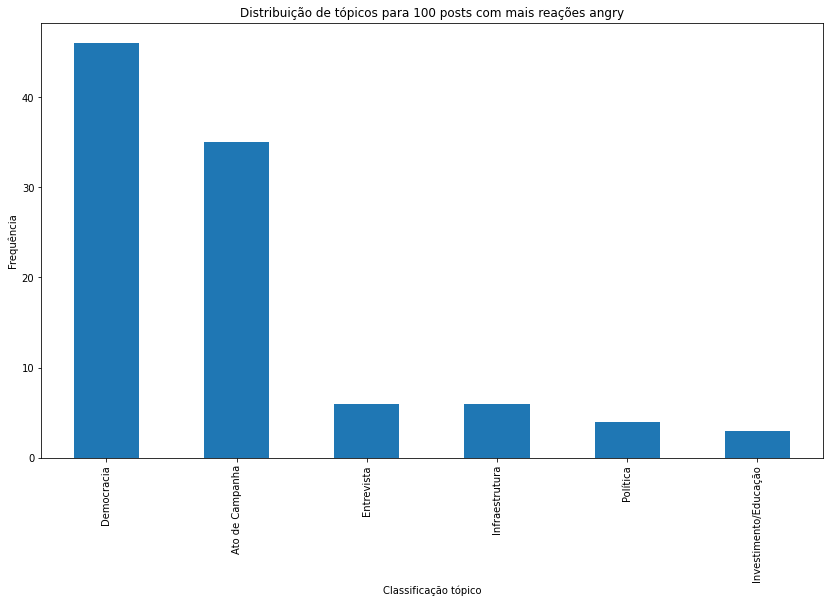

In [233]:
#===========================================================================
# as composicoes de topico relativas da amostra são então iluminadas com um 
# gráfico de barras (ano de 2018 para os posts com mais reações angry - 100)
#===========================================================================

ax = category_count_2018_sorted_by_angry.plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribuição de tópicos para 100 posts com mais reações angry")
ax.set_xlabel("Classificação tópico")
ax.set_ylabel("Frequência")

In [234]:
#===========================================================================
# etapa de testes (apenas para teste)
#===========================================================================

In [212]:
#===========================================================================
# removendo os posts sem menssagens do df_test
#===========================================================================
print('tamanho anterior do df test: {0}'.format(str(len(df_test))))
filter_mask  = df_test['has_textual_message'] == True
df_test = df_test[filter_mask]
print('número de posts do df teste desconsiderando os posts sem menssagens textuais: {0}'.format(str(len(df_test))))

tamanho anterior do df test: 541
número de posts do df teste desconsiderando os posts sem menssagens textuais: 541


In [213]:
#===========================================================================
# predizendo o topico por de cada uma das mensagens por meio do modelo lda
#===========================================================================

df_test['topic_classification'] = df_test['m_m_p_replaced_to_empty'].apply(lambda text:predict_topic(text,vectorizer=cv)[0])

In [214]:
#===========================================================================
# contando as categorias de tópicos apenas para as 100 postagens com +
# reações angry durante as eleições de 2018
#===========================================================================

category_count_2018_sorted_by_angry = df_test_sorted_by_angry.head(30)['topic_classification'].value_counts()
print(category_count_2018_sorted_by_angry)

Democracia               12
Ato de Campanha           7
Investimento/Educação     4
Saúde                     3
Entrevista                2
Infraestrutura            2
Name: topic_classification, dtype: int64


In [215]:
#===========================================================================
# ordenando df_test por reacoes angry
#===========================================================================

df_test_sorted_by_angry = df_test.sort_values('reactions_angry', ascending=False) # ordenando o df por angry

In [216]:
#===========================================================================
# contando as categorias de tópicos apenas para as 30 postagens com +
# reações angry durante as eleições de 2018
#===========================================================================

category_count_2018_sorted_by_angry = df_test_sorted_by_angry.head(30)['topic_classification'].value_counts()
print(category_count_2018_sorted_by_angry)

Democracia               12
Ato de Campanha           7
Investimento/Educação     4
Política                  3
Entrevista                2
Infraestrutura            2
Name: topic_classification, dtype: int64


Text(0, 0.5, 'Frequência')

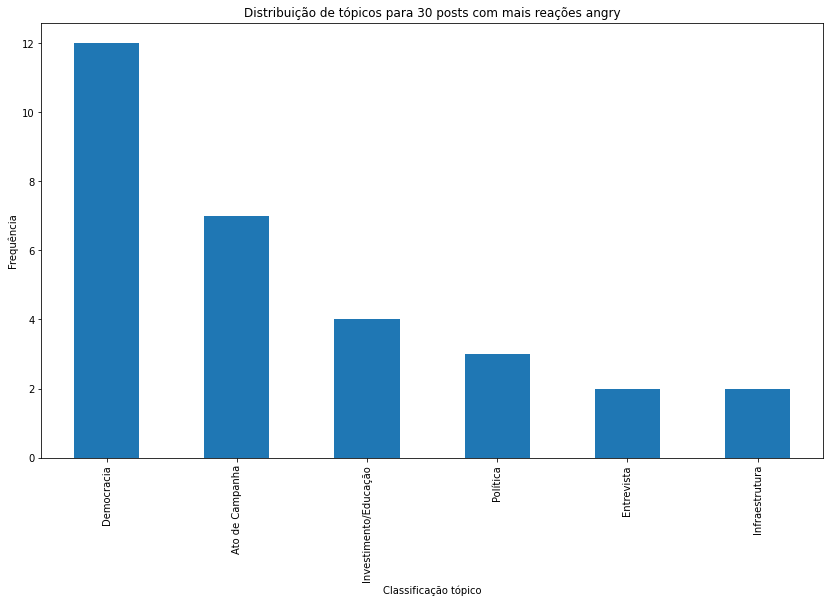

In [217]:
#===========================================================================
# as composicoes de topico relativas da amostra são então iluminadas com um 
# gráfico de barras (ano de 2018 para os posts com mais reações angry - 30)
#===========================================================================

ax = category_count_2018_sorted_by_angry.plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribuição de tópicos para 30 posts com mais reações angry")
ax.set_xlabel("Classificação tópico")
ax.set_ylabel("Frequência")

In [218]:
#===========================================================================
# Iterando sobre o df para visualizar as menssagens e seus topicos inferidos
#===========================================================================

for index,row in df_test_sorted_by_angry.iterrows():
   print(row['id'],row['m_m_p_replaced_to_empty'],':::',row['topic_classification'],'\n\n')

904277726319518_2141636845916927 vergonha internacional damares acusa pais holandeses masturbarem bebes partir sete meses gera indignacao ::: Política 


904277726319518_2241338135946797   rasga constituicao divulga video progolpe verdadeiro crime contra democracia trai juramento presidencial manter defender cumprir lei maior ::: Democracia 


904277726319518_2225503914196886 olha relacao causalidade genio descobriu inacreditavel despreparo simplesmente tudo ::: Política 


904277726319518_2222452741168670   diz maioria imigrantes boas intencoes caso trabalhar criar filhos alguem aposentou anos frase faz sentido ::: Democracia 


904277726319518_2262185507195393   desautoriza operacao andamento ibama contra madeira ilegal rondonia ::: Infraestrutura 


904277726319518_2128565730805086 vivo   responde perguntas populacao conversa artistas personalidades viravirou  ::: Democracia 


904277726319518_2206115756135702 longo discurso quatro minutos   diz militares democracia existe forcas ar

904277726319518_1560846124062198   presidente carapicuiba  e  ::: Política 


904277726319518_1136865046394117 texto reflexao escola partido golpe ::: Política 


904277726319518_2211352715612006 alguem sabe vila comentando agenda covas parece agora pronunciou dizem covas nestes pouco anos ausentou dias confere sei la to meio chateado vila covas ::: Entrevista 


904277726319518_2573723479374926 ato justica   neste domingo h av paulista  livre ::: Democracia 


904277726319518_2254491784592851 quatro dias pra votar confirme presenca evento   ::: Política 


904277726319518_2196628823886510   candidato   visita fundacao oswaldo cruz rio janeiro lindbergh farias senador marcia tiburi governadora   ::: Ato de Campanha 


904277726319518_467618857207259   entrevista economista eduardo moreira ::: Entrevista 


904277726319518_297070214227859   candidato   visita fundacao oswaldo cruz rio janeiro lindbergh farias senador marcia tiburi governadora   ::: Ato de Campanha 


904277726319518_113

904277726319518_958458670901423 cidade paulo obtem selo investimento agencia risco ::: Entrevista 


904277726319518_1542853889128562 otto   johnny hooker ::: Política 


904277726319518_1224597500954204 cinema gratuito periferia circuito spcine dezoito salas publicas cinema inauguradas gestao leva mil pessoas salas cinema paulo ano final ano duas salas entregues totalizando vinte salas previsao atingir milhao espectadores ano ::: Política 


904277726319518_1225745614172726 novo clube nautico sabado passado inauguramos clube esportivo nautico guarapiranga nova area lazer atender moradores fundao zona sul pra ter ideia novo clube mil m2 conta tres piscinas churrasqueiras campo futebol varias quadras poliesportivas palco shows salao jogos etc entrega representa transformar bairro cidade levar lazer populacao pessoas regiao vao precisar deslocar tanto ter lazer pra regiao recomendo fazer visita vista represa guarapiranga vale pena veja aqui ::: Democracia 


904277726319518_1148167061930